In [9]:
%matplotlib inline

import pandas as pd

columns = ["ACCEL_XOUT_H", "ACCEL_XOUT_L",
           "ACCEL_YOUT_H", "ACCEL_YOUT_L",
           "ACCEL_ZOUT_H", "ACCEL_ZOUT_L",
           "TEMP_OUT_H", "TEMP_OUT_L",
           "GYRO_XOUT_H", "GYRO_XOUT_L",
           "GYRO_YOUT_H", "GYRO_YOUT_L",
           "GYRO_ZOUT_H", "GYRO_ZOUT_L"]

df = pd.read_csv('measurements.csv', names=columns)

# 0: Full-range +/- 2g
# 1: Full-range +/- 4g
# 2: Full-range +/- 8g
# 3: Full-range +/- 16g
AFS_SEL = 3
AFS_SCALER = [2 / 32768, 4 / 32768, 8 / 32768, 16 / 32768]
scale = AFS_SCALER[AFS_SEL]

def twos_comp(val):
    bits = 16
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val                         # return posi

df['ACCEL_XOUT'] = ((df['ACCEL_XOUT_H'] * 256) + df['ACCEL_XOUT_L']).map(twos_comp).map(lambda i: scale * i)
df['ACCEL_YOUT'] = ((df['ACCEL_YOUT_H'] * 256) + df['ACCEL_YOUT_L']).map(twos_comp).map(lambda i: scale * i)
df['ACCEL_ZOUT'] = ((df['ACCEL_ZOUT_H'] * 256) + df['ACCEL_ZOUT_L']).map(twos_comp).map(lambda i: scale * i)
df['TEMP_OUT_C'] = ((((df['TEMP_OUT_H'] * 256) + df['TEMP_OUT_L']).map(twos_comp)) / 340) + 36.53
df['GYRO_XOUT'] = ((df['GYRO_XOUT_H'] * 256) + df['GYRO_XOUT_L']).map(twos_comp)
df['GYRO_YOUT'] = ((df['GYRO_YOUT_H'] * 256) + df['GYRO_YOUT_L']).map(twos_comp)
df['GYRO_ZOUT'] = ((df['GYRO_ZOUT_H'] * 256) + df['GYRO_ZOUT_L']).map(twos_comp)

df = df.drop(columns = columns)

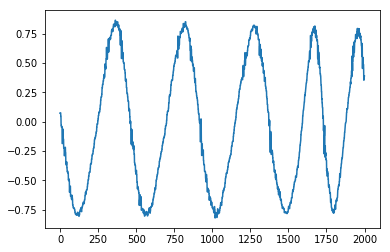

In [10]:
df['ACCEL_XOUT'][:2000].plot()

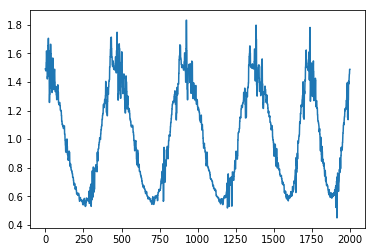

In [11]:
df['ACCEL_YOUT'][:2000].plot()

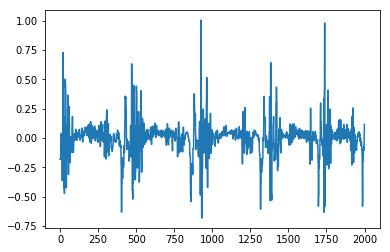

In [12]:
df['ACCEL_ZOUT'][:2000].plot()

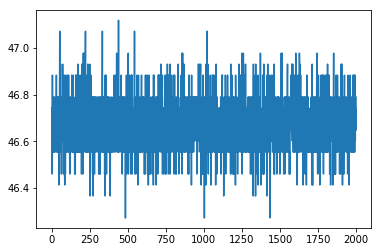

In [13]:
df['TEMP_OUT_C'][:2000].plot()

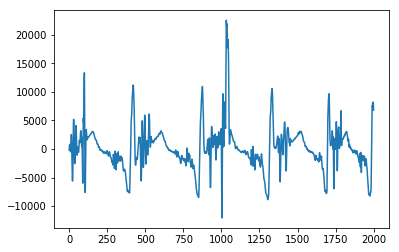

In [14]:
df['GYRO_XOUT'][:2000].plot()

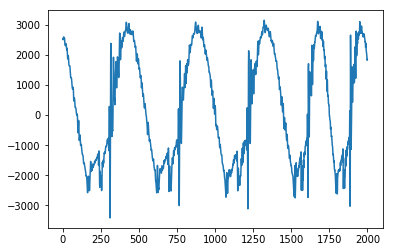

In [7]:
df['GYRO_YOUT'][:2000].plot()

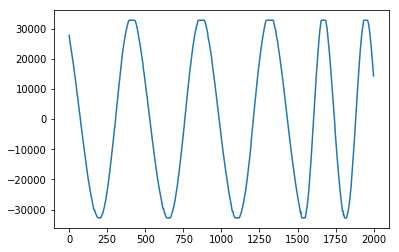

In [8]:
df['GYRO_ZOUT'][:2000].plot()